In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Analysis Pipleine - Group 23 - David Olson
---
- note: (a lot of this will be edited, as I am unsure if I will need to actually do all of these steps!!!!)
---
### 1. Load Data

- Loaded data, there is a difference in date. SPY has values from 1993-2020, and TSLA has values from 2010-2020. 
- 
- 
---
### 2. Clean Data
- Remove unnecessary columns/rows (if necessary unused years of SPY)
- Deal with "incorrect" data (if necessary)
- Deal with missing data (if necessary)
---
### 3. Process Data
- Create necessary new columns - ie. weighted avg., groups, categorizations etc.
- Find and replace operations (if necessary)
- Other substitutions as needed
- Deal with outliers
---
### 4. Wrangle Data
- Restructure data format (columns and rows)
- Merge other data sources into your dataset
---
### 5. Exploratory Data analysis (not required for this task)
---
### 6. Data Analysis (not required for this task)
---
### 7. Export reports/data analyses and visualizations (not required for this Task)



In [240]:
#Task 1 - Step 1 & 2 here

#Used: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#Used: https://stackoverflow.com/questions/58867452/drop-rows-from-pandas-dataframe-according-to-date
spy = "~/project-group23-project/data/raw/spy.csv"
tsla = "~/project-group23-project/data/raw/TSLA.csv"

spydf=pd.read_csv(spy)
tsladf=pd.read_csv(tsla)

#print(tsladf.describe().T)
#print(spydf.describe().T)
#print(len(spydf))
#print(len(tsladf))
#spydf.to_datetime
#spydf.dtypes

spydf['Date']=pd.to_datetime(spydf["Date"])


spydf = spydf[spydf.Date>pd.to_datetime('2010-06-28')]
spydf = spydf[spydf.Date<pd.to_datetime('2020-02-04')]
spydf = spydf.reset_index()
spydf = spydf.drop(columns = 'index')
spydf

# Here I converted spydf's 'Date' column into a datetime object
# I then made the range of dates from spydf match the tsladf.
# 2010-06-29 is the first date on BOTH dataframes
# 2020-02-03 is the last date on BOTH dataframes
# Both dataframes are now 2416 rows x 7 columns



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,106.019997,107.510002,103.550003,104.209999,84.502396,373649500
1,2010-06-30,103.919998,104.879997,102.879997,103.220001,83.699646,284101700
2,2010-07-01,103.150002,103.489998,101.129997,102.760002,83.326614,382924800
3,2010-07-02,103.110001,103.419998,101.620003,102.199997,82.872505,233385200
4,2010-07-06,103.639999,104.370003,101.879997,102.870003,83.415825,256935300
...,...,...,...,...,...,...,...
2411,2020-01-28,325.059998,327.850006,323.600006,326.890015,320.897308,63834000
2412,2020-01-29,328.380005,328.630005,326.399994,326.619995,320.632233,53888900
2413,2020-01-30,324.359985,327.910004,323.540009,327.679993,321.672821,75491800
2414,2020-01-31,327.000000,327.170013,320.730011,321.730011,315.831909,113845600


In [187]:
# Task 1 - Step 3 HERE:
# I plan on removing the "High", "Low", "Adj Close" columns from both dataframes as of right now
#spydf = spydf.drop(columns=["High","Low","Adj Close"])
#tsladf = tsladf.drop(columns=["High","Low","Adj Close"])
# They are now both 2416 rows x 4 columns. 
# I am going to also convert TSLA to datetime
#tsladf['Date']=pd.to_datetime(tsladf["Date"])


In [216]:
# Task 1 - Step 4 here
# I plan on merging the two dataframes into one.
# However, after a few attempts, I realized the column names are equivalent on both dataframes, so I will have to rename the columns.

# USED: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
# USED: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
# USED: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
# USED: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html
#spydf=spydf.rename(columns = {"Open":"open_spy","Close":"close_spy","Volume":"vol_spy"})
#tsladf=tsladf.rename(columns = {"Open":"open_tsla", "Close":"close_tsla","Volume":"vol_tsla"})
# I renamed a few columns to prepare for merging to a new dataframe.

tslaspydf = pd.DataFrame(pd.merge(tsladf,spydf,how='inner'))
tslaspydf = tslaspydf.round(decimals = 2)
tslaspydf
# the two dataframes are now merged into a dataframe called "tslaspydf"
# I also rounded the decimals to 2 places because it looks a lot nicer than 8.


,Date,open_tsla,close_tsla,vol_tsla,open_spy,close_spy,vol_spy
0,2010-06-29,19.00,23.89,18766300,106.02,104.21,373649500
1,2010-06-30,25.79,23.83,17187100,103.92,103.22,284101700
2,2010-07-01,25.00,21.96,8218800,103.15,102.76,382924800
3,2010-07-02,23.00,19.20,5139800,103.11,102.20,233385200
4,2010-07-06,20.00,16.11,6866900,103.64,102.87,256935300
...,...,...,...,...,...,...,...
2411,2020-01-28,568.49,566.90,11788500,325.06,326.89,63834000
2412,2020-01-29,575.69,580.99,17801500,328.38,326.62,53888900
2413,2020-01-30,632.42,640.81,29005700,324.36,327.68,75491800
2414,2020-01-31,640.00,650.57,15719300,327.00,321.73,113845600


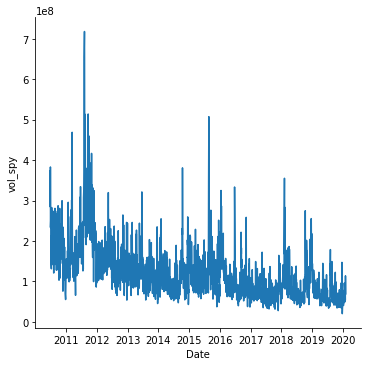

In [239]:
# Volume comparison in TSLA vs SPY
# sns.relplot(x=tslaspydf['Date'], y = tslaspydf["vol_spy"], kind = 'line')
